In [62]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd

style.use('ggplot')

In [63]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=1)
df.head()

,Symbol,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,TSLA,23.89,25.0000,17.54,19.00,18783276
2010-06-30,TSLA,23.83,30.4192,23.30,25.96,17194394
2010-07-01,TSLA,21.96,25.9200,20.27,25.00,8216789
2010-07-02,TSLA,19.20,23.1000,18.71,23.00,5135795
2010-07-05,TSLA,19.20,19.2000,19.20,19.20,0


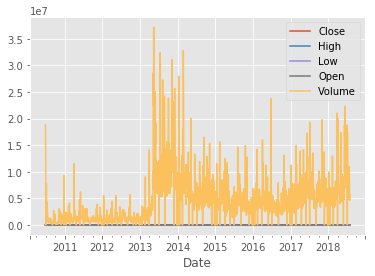

In [64]:
df.plot()

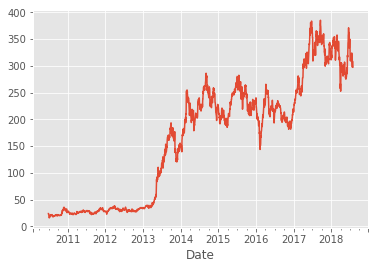

In [65]:
df['Close'].plot()

In [66]:
#moving average
#df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()


#ten days split data
df_ohlc = df['Close'].resample('10D').ohlc()
df_ohlc.head(10)

,open,high,low,close
Date,,,,
2010-06-29,23.89,23.890,15.800,17.46
2010-07-09,17.40,20.640,17.050,20.64
2010-07-19,21.91,21.910,20.220,20.72
2010-07-29,20.35,21.950,19.590,19.59
2010-08-08,19.60,19.600,17.600,19.15
2010-08-18,18.77,20.130,18.770,19.70
2010-08-28,19.87,21.060,19.480,21.05
2010-09-07,20.54,21.980,20.170,20.94
2010-09-17,20.23,21.055,19.560,20.10


In [67]:
df_volume = df['Volume'].resample('10D').sum()
df_volume.head(10)

Date
2010-06-29    70818739
2010-07-09    19480763
2010-07-19     9186865
2010-07-29     5442078
2010-08-08     5137022
2010-08-18     4550878
2010-08-28     2350344
2010-09-07     5663422
2010-09-17     5151812
2010-09-27     7304251
Freq: 10D, Name: Volume, dtype: int64

In [68]:
df_ohlc.reset_index(inplace=True)#resets the index of the df, now the dates is not the index
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,23.89,23.89,15.80,17.46
1,2010-07-09,17.40,20.64,17.05,20.64
2,2010-07-19,21.91,21.91,20.22,20.72
3,2010-07-29,20.35,21.95,19.59,19.59
4,2010-08-08,19.60,19.60,17.60,19.15


In [69]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num) #convers the dates format datetime to  Matplotlib dates.
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.89,23.89,15.80,17.46
1,733962.0,17.40,20.64,17.05,20.64
2,733972.0,21.91,21.91,20.22,20.72
3,733982.0,20.35,21.95,19.59,19.59
4,733992.0,19.60,19.60,17.60,19.15


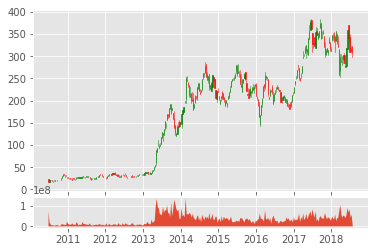

In [75]:
#plotting with pure matplotlib
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)